In [1]:
#Importing required modules
from scipy.spatial.distance import euclidean
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

Import the dataset

In [2]:
pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/data_pickle/all_sentences_pca.pkl')

# To do a matrix : pca_df = pca_df.values attention select the pca row before

Plot PCA1 vs PCA2

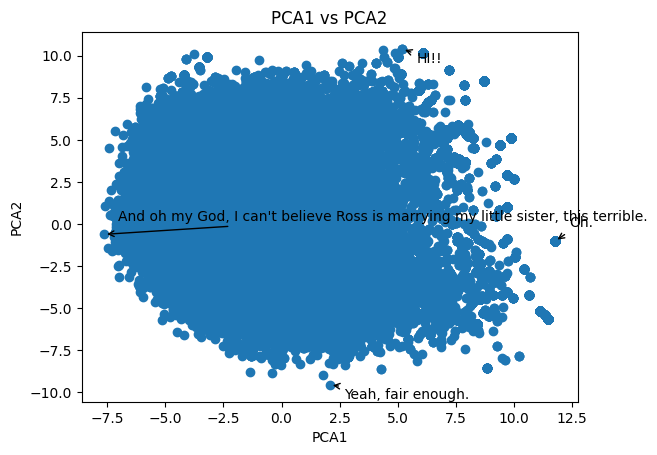

In [3]:
# Plotting PCA1 and PCA2

plt.scatter(pca_df['PCA1'], pca_df['PCA2'])

# Finding the index of the furthest words on each axis
max_pca1_index = pca_df['PCA1'].idxmax()
max_pca2_index = pca_df['PCA2'].idxmax()

min_pca1_index = pca_df['PCA1'].idxmin()
min_pca2_index = pca_df['PCA2'].idxmin()

# Getting the corresponding words
max_pca1_word = pca_df['Said'][max_pca1_index]
max_pca2_word = pca_df['Said'][max_pca2_index]

min_pca1_word = pca_df['Said'][min_pca1_index]
min_pca2_word = pca_df['Said'][min_pca2_index]

# Annotating the furthest words on each axis
plt.annotate(max_pca1_word, (pca_df['PCA1'][max_pca1_index], pca_df['PCA2'][max_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(max_pca2_word, (pca_df['PCA1'][max_pca2_index], pca_df['PCA2'][max_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca1_word, (pca_df['PCA1'][min_pca1_index], pca_df['PCA2'][min_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca2_word, (pca_df['PCA1'][min_pca2_index], pca_df['PCA2'][min_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))




# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')

# Displaying the plot
plt.show()


Smallest et largest values from a PCA

In [4]:
x= pca_df.nsmallest(2000,'PCA20')
print('nSmaller')
print(x['Said'])
print()
x=pca_df.nlargest(2000,'PCA20')
print('nlargest')
print(x['Said'])

nSmaller
60099                           It's totally fine.
67272                         It's not bad at all.
40515    Except for Christmasand their birthdays.
32891                 Every thing's--they're fine.
62186               There's nothing wrong with it.
                           ...                    
81645                                          No.
81916                                          No.
81938                                          No.
82050                                          No.
82313                                          No.
Name: Said, Length: 2000, dtype: object

nlargest
14162                           Is he here?
14163                           Is he here?
32050                           Is he here?
77032                           Is he here?
72561    You don't think he's here, do you?
                        ...                
4749                         You know what?
7141                         You know what?
7388                        

Creation of 20 clusters

In [5]:
num_clusters = 20

X = pca_df.loc[:,'PCA1':'PCA20'] #select all the PCA

#Initialize the class object
kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=25)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
# adding a cluster column to the dataset
pca_df['Cluster']= label

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)


Here a create a list in order to get the closest point to each cluster center

In [6]:
from scipy.spatial.distance import euclidean

df2= X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    print('closest point to cluster center: ', cluster_pts[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    print('  ', df2[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print(pca_df['Person'][cluster_pts_indices[min_idx]],':',pca_df['Said'][cluster_pts_indices[min_idx]])


closest point to cluster center:  [ 6.560065    1.6316509  -4.716534   -0.9797509   4.7792616  -0.4999287
  3.1398544   0.10028674 -1.524307    1.3720108  -1.2331302   1.8335608
  0.81077254  2.8219986  -1.6140236  -1.6759441  -1.6492019   0.5659246
  0.5607548  -0.16731341]
closest index of point to cluster center:  18352
   [ 6.560065    1.6316509  -4.716534   -0.9797509   4.7792616  -0.4999287
  3.1398544   0.10028674 -1.524307    1.3720108  -1.2331302   1.8335608
  0.81077254  2.8219986  -1.6140236  -1.6759441  -1.6492019   0.5659246
  0.5607548  -0.16731341]
Rachel : Oh...!
closest point to cluster center:  [-1.5950668  -0.45225805  0.6980662  -3.4879732   1.8005354  -0.07110179
 -1.2415332  -0.29644883  0.6362617  -0.93481237 -0.7309583  -1.8106369
 -1.3873706   0.2108988   0.02089085 -1.604688   -0.34862828  1.6267503
  1.0476754  -2.2030683 ]
closest index of point to cluster center:  37427
   [-1.5950668  -0.45225805  0.6980662  -3.4879732   1.8005354  -0.07110179
 -1.2415332 

Phoebe : Wha..?
closest point to cluster center:  [-0.74959964 -3.0955122   0.29936695 -1.1319437   0.03616876 -0.33765674
 -0.97687644  1.7300603   0.6110595   0.27806792  0.8602785  -0.70154727
 -3.1740608  -0.33882952 -0.23449919  0.8097537   0.1293255  -0.13625693
 -0.45444462 -0.4116295 ]
closest index of point to cluster center:  55683
   [-0.74959964 -3.0955122   0.29936695 -1.1319437   0.03616876 -0.33765674
 -0.97687644  1.7300603   0.6110595   0.27806792  0.8602785  -0.70154727
 -3.1740608  -0.33882952 -0.23449919  0.8097537   0.1293255  -0.13625693
 -0.45444462 -0.4116295 ]
Ross : No ad-libbing    and dude, you can't touch the paintings.
closest point to cluster center:  [-1.2001734   0.05133142  0.28672868  0.51631707 -4.6271343  -0.2628241
 -2.35415     1.9657536   0.24887536  0.49689594  1.3236402   1.0806684
  0.16217782  1.7369394   0.6952758   0.73722273 -0.12139805 -0.38832864
 -0.08325981  0.25125137]
closest index of point to cluster center:  36587
   [-1.2001734   

Plot of all the clusters with their centers and the corresponding sentences.

[18352, 37427, 14972, 35668, 15484, 96, 2268, 91624, 17755, 39995, 4625, 24830, 14488, 9486, 15213, 55683, 36587, 66230, 90926, 3218]


C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\amaca253\Anaconda3\envs\env\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


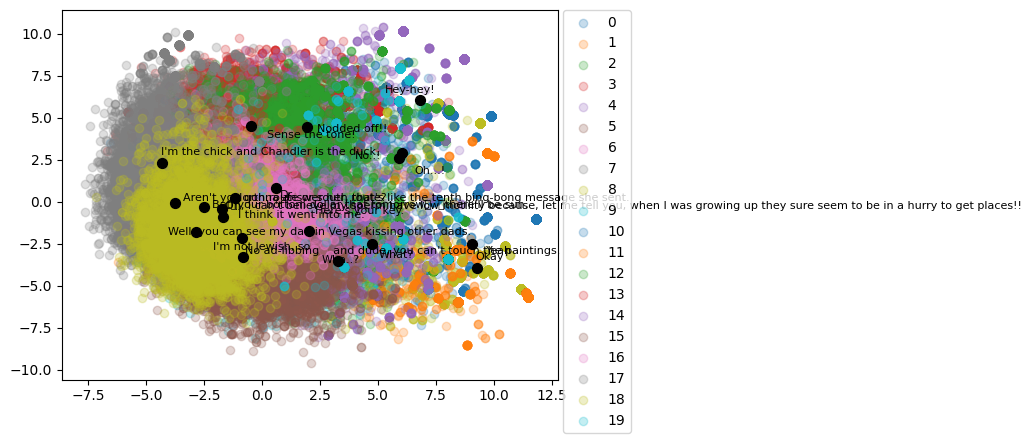

In [7]:
print(closest_pt_idx)
#plotting the results:
df2 = X.values
 
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i, alpha= 0.25)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
for i in closest_pt_idx:
    plt.annotate(pca_df['Said'][i], (df2[i,0], df2[i, 1]), fontsize=8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.show()

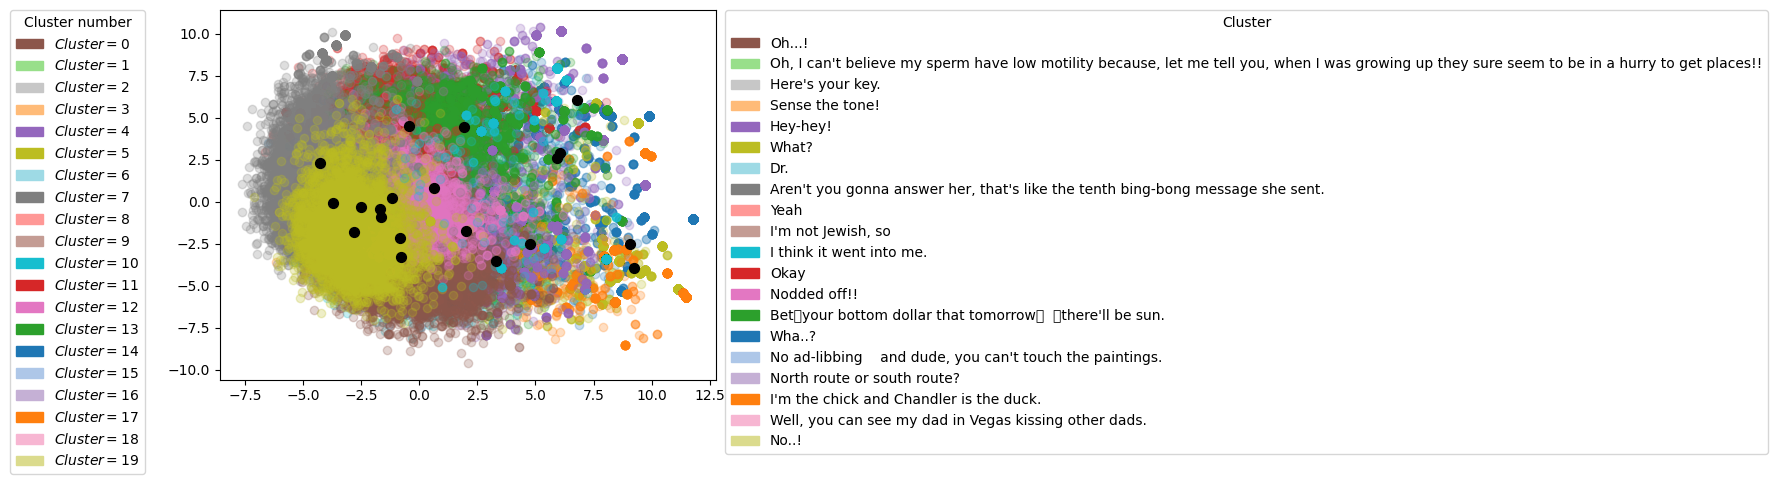

In [8]:
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
colors = sns.color_palette('tab20', 20)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)
plt.show()

Plot for each characters the percentage of each cluster. 

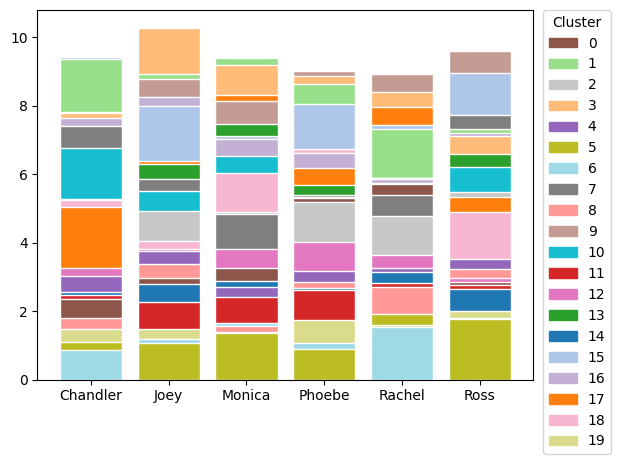

In [9]:


name=np.unique(pca_df['Person'])
r= np.arange(len(name))

colors = sns.color_palette('tab20', 20)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

for i in name:
    character =pca_df[pca_df['Person'].str.contains(i)]
    percentage = character['Cluster'].value_counts(normalize=True) * 100 # decreasing order
    x = np.zeros(num_clusters)
    for cluster_val in percentage.index:
        x[cluster_val]=percentage[cluster_val]
        plt.bar(i,x[cluster_val], edgecolor='white', color=ind_col_map[cluster_val], label=f'$Cluster = {cluster_val}$')
        

legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

    # display the graph.
plt.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

plt.show()



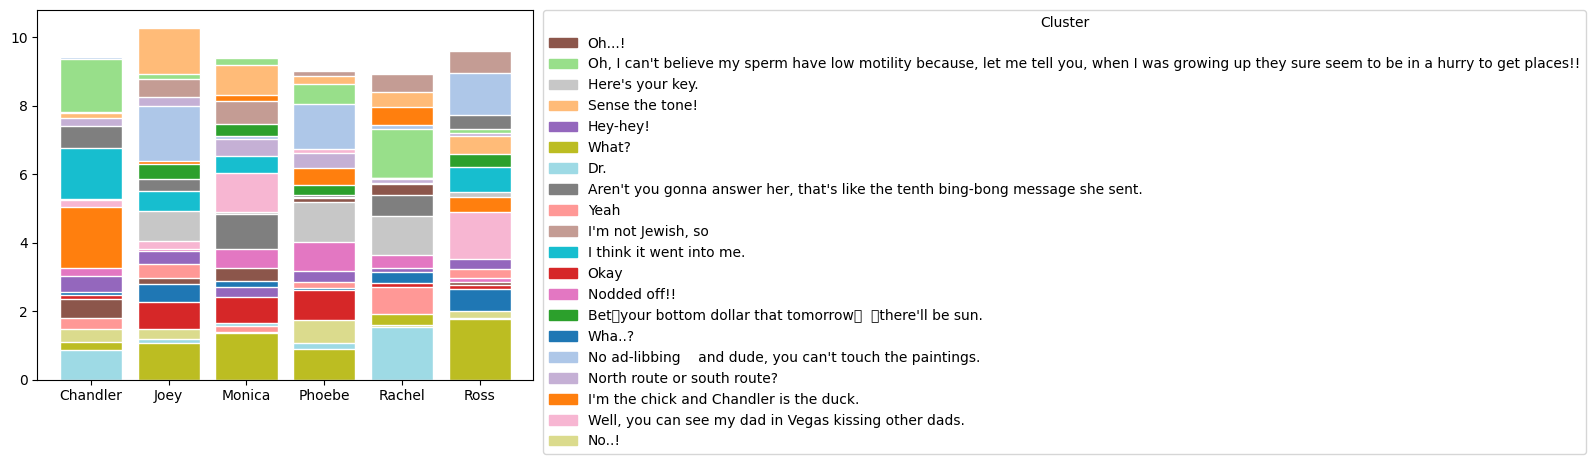

In [10]:
import matplotlib.patches as mpatches
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]

name=np.unique(pca_df['Person'])
r= np.arange(len(name))

colors = sns.color_palette('tab20', 20)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

for i in name:
    character =pca_df[pca_df['Person'].str.contains(i)]
    percentage = character['Cluster'].value_counts(normalize=True) * 100 # decreasing order

    x = np.zeros(num_clusters)
    for cluster_val in percentage.index:
        x[cluster_val]=percentage[cluster_val]
        plt.bar(i,x[cluster_val], edgecolor='white', color=ind_col_map[cluster_val], label=f'$Cluster = {cluster_val}$')
        

legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=text[key]))

plt.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

plt.show()




## Standard deviation

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

X = pca_df.loc[:,'PCA1':'PCA20']  #select all the PCA

# Number of clusters
num_clusters = 20

# Number of iterations
num_iterations = 10

# List to store standard deviation values for each cluster
cluster_std_deviations = []

# Run clustering process 100 times
for _ in range(num_iterations):
    
   #Initialize the class object
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=25)

    #predict the labels of clusters.
    label = kmeans.fit_predict(X)
    
    # Get cluster labels and cluster centers
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate standard deviation for each cluster
    std_deviations = []
    for i in range(num_clusters):
        cluster_points = pca_df.loc[pca_df['Cluster'] == i,['PCA1','PCA2']]
        cluster_points = cluster_points.values
        std_deviation = np.std(cluster_points, axis=0)
        std_deviations.append(std_deviation)
    
    # Append the standard deviation values to the list
    cluster_std_deviations.append(std_deviations)

# Print standard deviation values for each cluster
for i, std_deviations in enumerate(cluster_std_deviations):
        print(f"Cluster {i+1}: {std_deviations}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Generate some random data points

data = X.values

# Assume you have already clustered your data and have labels for each point
labels = label
# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Iterate over unique labels to plot convex hulls for each cluster
for i in u_labels:
    # Get the points belonging to the current cluster
    #cluster_points = data[labels == label]
    cluster_points = pca_df.loc[pca_df['Cluster'] == i,['PCA1','PCA2']]
    cluster_points =  cluster_points.values

    # Compute the convex hull for the current cluster
    hull = ConvexHull(cluster_points)

    # Plot the convex hull
    ax.plot(cluster_points[:, 0], cluster_points[:, 1], 'o')
    for simplex in hull.simplices:
        ax.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-')

# Set labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


# find the 50% firsts points near the center of the cluster in 2 dim and then plot the hull


In [ ]:

from scipy.spatial import ConvexHull
df2= X.values
cluster_data=df2

# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]
    cluster_data = cluster_pts_indices

    centroid = kmeans.cluster_centers_[iclust]
   #min_idx = [euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices]
    
    # Step 2: Calculate the distance of each point from the centroid
    distances = [euclidean(df2[idx], centroid) for idx in cluster_pts_indices]

    # Step 3: Sort the distances in ascending order
    sorted_distances = np.sort(distances)

    # Step 4: Determine the number of points to select (50% of the points)
    num_points = len(cluster_data)
    num_points_to_select = int(num_points / 2)

    # Step 5: Select the nearest points
    selected_indices = np.argsort(distances)[:num_points_to_select]
    selected_points = cluster_data[selected_indices]

# Step 6: Plot the hull
hull = ConvexHull(selected_points.values)
plt.plot(selected_points[:, 0], selected_points[:, 1], 'o', label='Selected Points')
for simplex in hull.simplices:
    plt.plot(selected_points[simplex, 0], selected_points[simplex, 1], 'k-')

plt.plot(centroid[0], centroid[1], 'r*', markersize=10, label='Centroid')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Convex Hull of Selected Points near Cluster Center')
plt.legend()
plt.show()





In [ ]:
data = X.values

# Assume you have already clustered your data and have labels for each point
labels = label
# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Iterate over unique labels to plot convex hulls for each cluster
for i in u_labels:
    # Get the points belonging to the current cluster
    #cluster_points = data[labels == label]
    cluster_points = pca_df.loc[pca_df['Cluster'] == i,['PCA1','PCA2']]
    cluster_points =  cluster_points.values
    
    # Find the distances between data points and cluster centers
    distances = kmeans.transform(X)
    # Sort the distances for each data point
    sorted_distances = np.argsort(distances, axis=0)
    # Get the indices of the 50% closest points for each cluster
    indices = sorted_distances[:int(len(data) / 2), :]
    # Get the actual data points using the indices
    closest_points = data[indices.flatten()]

    # Compute the convex hull for the current cluster
    hull = ConvexHull(closest_points)

    # Plot the convex hull
    ax.plot(cluster_points[:, 0], cluster_points[:, 1], 'o')
    for simplex in hull.simplices:
        ax.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-')

# Set labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()








# Study of Ross

Here we are looking for the average phrase in the cluster.
Since we already have the clusters, we will extract the data of "Ross", and do the average of the cluster depending on 'Ross' only.

In [ ]:
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # we collect all the data from the dataset of a precise cluster
    cluster_pts = pca_df[kmeans.labels_ == iclust] 
    # we extract only ross
    cluster_pts =  cluster_pts[cluster_pts['Person'].str.contains('Ross')] 
    # we get the index
    cluster_pts_indices = cluster_pts.index 
    # Center of the cluster
    cluster_cen = kmeans.cluster_centers_[iclust] 
    # Closest sentence from the center of the cluster
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices]) 

    # Testing:    
    #print('closest point to cluster center: ', cluster_pts.iloc[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    #print('  ', pca_df.iloc[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print(pca_df['Person'][cluster_pts_indices[min_idx]],':',pca_df['Said'][cluster_pts_indices[min_idx]])

In [ ]:
character =pca_df[pca_df['Person'].str.contains('Ross')]
percentage = character['Cluster'].value_counts(normalize=True) * 100
df3 = percentage.to_frame(name="Percentage")
value = [df3.loc[i].values for i in df3.index]


In [ ]:
# Preparation for the plot
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
value = [df3.loc[i].values for i in range(num_clusters)]
lists= df3.index.values.tolist()

# Plot
colors = sns.color_palette('tab20', 20)
# Initialize layout
for i in range(num_clusters):
    plt.bar(i, df3.loc[i].values,label=text[i], color=colors[i]) # Here is loc and not iloc!!!!


plt.legend(title='Cluster medium sentences',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(np.arange(20))
plt.xlabel("Cluster number")
plt.ylabel("Percentage")
plt.title("Ross cluster percentage and his average sentence")

plt.show()

In [ ]:
cluster_points = ross.loc[ross['Cluster'] == 0,['PCA1','PCA2']]
    
max_pca1_index = cluster_points['PCA1'].idxmax()
max_pca2_index = cluster_points['PCA2'].idxmax()
min_pca1_index = cluster_points['PCA1'].idxmin()
min_pca2_index = cluster_points['PCA2'].idxmin()

# Getting the corresponding words
max_pca1_word = ross['Said'][max_pca1_index]
max_pca2_word = ross['Said'][max_pca2_index]
min_pca1_word = ross['Said'][min_pca1_index]
min_pca2_word = ross['Said'][min_pca2_index]


In [ ]:
plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'])

# Annotating the furthest words on each axis
plt.annotate(max_pca1_word, (cluster_points['PCA1'][max_pca1_index], cluster_points['PCA2'][max_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(max_pca2_word, (cluster_points['PCA1'][max_pca2_index], cluster_points['PCA2'][max_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca1_word, (cluster_points['PCA1'][min_pca1_index], cluster_points['PCA2'][min_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca2_word, (cluster_points['PCA1'][min_pca2_index], cluster_points['PCA2'][min_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))


clust =  cluster_points.values
hull = ConvexHull(clust)
ax.plot(clust[:, 0], clust[:, 1], 'o')
for simplex in hull.simplices:
    ax.plot(clust[simplex, 0], clust[simplex, 1], 'k-')

# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster 0: PCA1 vs PCA2')

# Displaying the plot
plt.show()